In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [86]:
# Reading in the CSV file and cleaning it
df = pd.read_csv("animes.csv")
# Removing duplicates as there are duplicates of some animes for some reason
df = df.drop_duplicates(subset = "title")
df = df.fillna(0)
df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",1.0,34155,2382,1728.0,7.50,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",12.0,61459,1648,1727.0,7.50,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",12.0,67422,1547,1548.0,7.56,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",1.0,41077,2154,1544.0,7.56,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [87]:
# Filtering data frame into the features that will be used
features = ["episodes", "members", "popularity", "ranked", "score"]
df_features = df[features]
df_features

,episodes,members,popularity,ranked,score
0,25.0,489888,141,25.0,8.82
1,22.0,995473,28,24.0,8.83
2,13.0,581663,98,23.0,8.83
3,64.0,1615084,4,1.0,9.23
4,1.0,214621,502,22.0,8.83
...,...,...,...,...,...
19002,1.0,34155,2382,1728.0,7.50
19003,12.0,61459,1648,1727.0,7.50
19004,12.0,67422,1547,1548.0,7.56
19005,1.0,41077,2154,1544.0,7.56


In [88]:
# Normalizing the data
scaled_df = df.copy()
scaler = StandardScaler().set_output(transform = "pandas")
scaled_features = scaler.fit_transform(df_features)
scaled_df[features] = scaled_features
scaled_df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",0.283722,4.924037,-1.701217,-1.428848,1.967669,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",0.221568,10.309193,-1.725188,-1.429066,1.975216,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",0.035106,5.901563,-1.710339,-1.429284,1.975216,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",1.091724,16.908880,-1.730279,-1.434079,2.277112,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",-0.213510,1.992075,-1.624637,-1.429502,1.975216,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"['Action', 'Comedy', 'Super Power', 'Martial A...","Jan 1, 2011",-0.213510,0.069870,-1.225826,-1.057637,0.971411,https://cdn.myanimelist.net/images/anime/3/304...,https://myanimelist.net/anime/10075/Naruto_x_UT
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"['Slice of Life', 'Comedy', 'Supernatural']","Jan 12, 2018 to Mar 30, 2018",0.014388,0.360694,-1.381532,-1.057855,0.971411,https://cdn.myanimelist.net/images/anime/1486/...,https://myanimelist.net/anime/35828/Miira_no_K...
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","['Slice of Life', 'Comedy', 'Shounen']","Sep 27, 2011 to Dec 25, 2011",0.014388,0.424208,-1.402957,-1.096873,1.016695,https://cdn.myanimelist.net/images/anime/6/301...,https://myanimelist.net/anime/10378/Shinryaku_...
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",['Action'],"Jul 9, 2016",-0.213510,0.143599,-1.274192,-1.097744,1.016695,https://cdn.myanimelist.net/images/anime/12/79...,https://myanimelist.net/anime/33082/Kingsglaiv...


In [89]:
# Reducing dimensionality of data to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)
pca_data

array([[ 4.68005266,  0.49504743],
       [ 6.91844607,  0.85943627],
       [ 5.07887462,  0.32892274],
       ...,
       [ 2.036217  , -0.13792393],
       [ 1.83198782, -0.372008  ],
       [ 2.37675124, -0.3224754 ]])

In [94]:
k_range = range(2, 11)
scores = []
# Finding most optimal k value
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(pca_data)
    scores.append(silhouette_score(pca_data, cluster_labels))

optimal = k_range[np.argmax(scores)]

C:\Users\Dickk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dickk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dickk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dickk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [95]:
# Assigning clusters to each anime
kmeans = KMeans(n_clusters=optimal)
clusters = kmeans.fit_predict(pca_data)

C:\Users\Dickk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
# Adding clusters to the original data
df['Cluster'] = clusters
# Printing out useful statistics for each cluster
for k in range(optimal):
    cluster_data = df[df['Cluster'] == k]
    print(f"Cluster {k+1}:")

    # Mean and count for each feature
    print(cluster_data[features].count())
    print(cluster_data[features].mean())
    
    # Top 5 most common genres within the cluster
    print(cluster_data['genre'].explode().value_counts().head(5))

    # Top 5 titles in the cluster based on popularity
    print(cluster_data.sort_values('popularity', ascending=True)[['title', 'popularity']].head(5))
    print("\n")

Cluster 1:
episodes      8497
members       8497
popularity    8497
ranked        8497
score         8497
dtype: int64
episodes          8.877486
members        1240.155820
popularity    11739.737672
ranked         9931.426503
score             5.480105
dtype: float64
['Music']            584
['Comedy']           476
['Kids']             397
['Dementia']         200
['Music', 'Kids']    182
Name: genre, dtype: int64
                                                 title  popularity
7564                                              Pupa         899
1685  Made in Abyss Movie 3: Fukaki Tamashii no Reimei         991
1725         Tensei shitara Slime Datta Ken 2nd Season        1114
1564                  Yakusoku no Neverland 2nd Season        1124
1652          Kimetsu no Yaiba Movie: Mugen Ressha-hen        1138


Cluster 2:
episodes      7708
members       7708
popularity    7708
ranked        7708
score         7708
dtype: int64
episodes         12.086663
members       56676.394914
pop

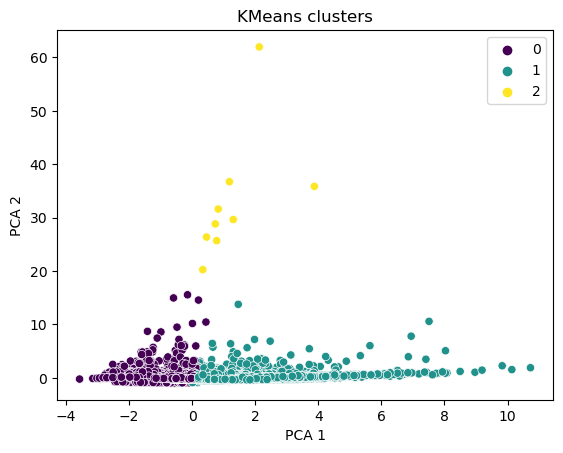

In [97]:
# Creating scatterplot representation of the clusters
sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1], hue=clusters, data=df, palette='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans clusters')
plt.show()